In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
# Data path for csv files
DATA_PATH = "./"#"/kaggle/input/titanic/"
# Training dataset
train = pd.read_csv(DATA_PATH + "train.csv")

In [4]:
# Check first 5 rows
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Start off by checking the number of rows and columns/features
train.shape

(891, 12)

There are total 891 samples and 12 features.

In [6]:
# Check the datatype of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


`PassengerId` can serve as the key unique column since no two passengers can have the same `PassengerId`. There are some columns with datatype `object` aka string. We will need to go in depth of these columns to make sure they are in the right datatype.

In [7]:
# Describe the numerical attributes
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. `PassengerId` is an ID attribute and it's description is not relevant to our case.
2. `Survived` is a binary target variable -> 0 meaning the person didn't survive and 1 meaning the person survived.
3. `Age`, a minimum age of 0.42 years is not realistic and can be removed. Similarly, there is a maximum value of 80 years. This will need to be investigated in detail.
4. `SibSp` represents the number of siblings/spouses aboard the Titanic. It's better to treat it as a categorical variable rather than a continuous variable.
5. Similarly, `Parch` should be treated as a categorical variable.
6. `Fare` - The minimum fare is 0 which means that someone travelled for free, which doesn't make sense. Similarly, there is a high jump between 75% percentile and the maximum value of the attribute. This can be for a high fare ticket.

In [8]:
train.isna().sum()/len(train.index) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Note that there are 77.1% missing values in `Cabin` attribute and 19.86% missing values in `Age` attribute. Removing the rows with missing values in this case will result in losing a substantial amount of data. It's better to either impute the values or remove the column.

In [9]:
import seaborn as sns

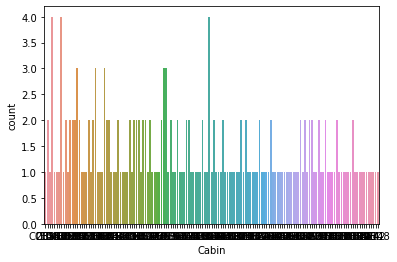

In [10]:
sns.countplot("Cabin",data=train)

In [11]:
len(train.Cabin.unique())

148

In [12]:
train.Cabin.value_counts().max()

4

In [13]:
train.Cabin.isna().sum()

687

Note that there are 687 missing values in this attribute, 148 unique cabin numbers and the most occurring cabin number has a total occurrence of 4. Even though it would be important to understand which cabin number had the maximum/minimum survivers, the current data is not suitable to take into account the effect of cabin number. It's better to remove the `Cabin` attribute.

In [14]:
colsToDrop = ["Cabin"]

In [15]:
train.drop("Cabin",axis=1,inplace=True)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Next, `Name` is one similar attribute that can be removed as the name of the passenger won't affect their survival.

In [17]:
colsToDrop.append("Name")
train.drop("Name",axis=1,inplace=True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [19]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
train[train.Age==train.Age.min()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
803,804,1,3,male,0.42,0,1,2625,8.5167,C


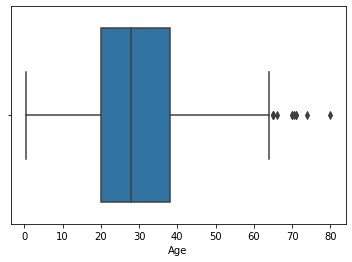

In [21]:
sns.boxplot(train.Age)

In [22]:
train[(train.Age>70) & (train.Age<=80)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,97,0,1,male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,male,70.5,0,0,370369,7.7500,Q
493,494,0,1,male,71.0,0,0,PC 17609,49.5042,C
630,631,1,1,male,80.0,0,0,27042,30.0000,S
851,852,0,3,male,74.0,0,0,347060,7.7750,S


In [23]:
train[train.Age<1]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
78,79,1,2,male,0.83,0,2,248738,29.0000,S
305,306,1,1,male,0.92,1,2,113781,151.5500,S
469,470,1,3,female,0.75,2,1,2666,19.2583,C
644,645,1,3,female,0.75,2,1,2666,19.2583,C
755,756,1,2,male,0.67,1,1,250649,14.5000,S
803,804,1,3,male,0.42,0,1,2625,8.5167,C
831,832,1,2,male,0.83,1,1,29106,18.7500,S


Note that there are several passengers with age less than 1 which means that they are babies. Due to a significant number of such passengers, we won't remove the passenger with minimum age. Next, even though there is just one passenger with age 80, there are 5 passengers with age between 71 and 80 (inclusive). Thus, there is no need to remove the passenger with age 80.

In [24]:
train.Age.mean()

29.69911764705882

For the missing values, since it's a continuous variable, it's better to impute the data with average age.

In [25]:
train.Age = train.Age.fillna(train.Age.mean())

In [26]:
train.isna().sum()/len(train.index)*100

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [27]:
train.Embarked.isna().sum()

2

In [28]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Note that `Embarked` attribute has 0.22% missing values or just 2 rows. We can either remove those rows or impute them with mode. Let's impute the data.

In [29]:
train.Embarked = train.Embarked.fillna("S")

In [30]:
train.isna().sum()/len(train.index)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

There are no more missing values in the data.

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [32]:
train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [33]:
train.Ticket.value_counts()

347082      7
1601        7
CA. 2343    7
CA 2144     6
347088      6
           ..
13567       1
367228      1
36209       1
3474        1
36568       1
Name: Ticket, Length: 681, dtype: int64

Ticket number should be unique for each user and thus is not relevant for analysis.

In [34]:
colsToDrop.append("Ticket")

In [35]:
train.drop("Ticket",axis=1,inplace=True)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [37]:
train.Sex = train.Sex.map({"male":0,"female":1})

In [38]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [39]:
onehot = pd.get_dummies(train.Embarked,prefix="Embarked",drop_first=False)

In [40]:
colsToDrop.append("Embarked")
train.drop("Embarked",inplace=True,axis=1)

In [41]:
onehot.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [42]:
train = pd.concat([train,onehot],axis=1)

In [43]:
def processDataFrame(df):
    df.Sex = df.Sex.map({"male":0,"female":1})
    onehot = pd.get_dummies(df.Embarked,prefix="Embarked",drop_first=False)
    df = pd.concat([df,onehot],axis=1)
    # Drop columns
    df.drop(colsToDrop,axis=1,inplace=True)
    return df

In [44]:
test = pd.read_csv(DATA_PATH + "test.csv")

In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
test = processDataFrame(test)

In [47]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,1


In [48]:
train.drop("PassengerId",axis=1,inplace=True)
test.drop("PassengerId",axis=1,inplace=True)

In [49]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [50]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1


In [51]:
X = train.drop("Survived",axis=1)
y = train.Survived

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
y_train.shape, y_test.shape

((623,), (268,))

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr = LogisticRegression()

In [57]:
lr.fit(X_train,y_train)

/home/hp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
y_pred = lr.predict(X_test)

In [60]:
accuracy_score(y_train,lr.predict(X_train))

0.8009630818619583

In [61]:
accuracy_score(y_test,y_pred)

0.8059701492537313

Clearly there is no overfitting involved.

## Future Steps

1. Identify the correlation between features.
2. Use statmodel module to carry out Logistic Regression while keeping an eye on VAF and p-score to remove the features which are not required.
3. Use other classification models like decision tree, random forest, Gradient boosting, XG Boost, adaboost, kNN, gaussian naive bayes and carry out a comparison.

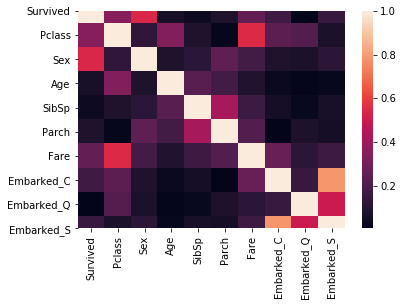

In [64]:
# Correlation between features
sns.heatmap(abs(train.corr()))

`Survived` has the highest correlation with `Sex`. `Pclass` is highly correlated with `Fare`, `Embarked_C`, `Embarked_Q` and `Embarked_S` are also correlated with each other which is surprising since these variables represent the place of embarkation.

In [66]:
import statsmodels.api as sm

In [67]:
logit = sm.Logit(y_train,X_train)

In [68]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.450767
         Iterations 6


In [69]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      614
Method:                           MLE   Df Model:                            8
Date:                Wed, 13 Nov 2019   Pseudo R-squ.:                  0.3164
Time:                        18:43:55   Log-Likelihood:                -280.83
converged:                       True   LL-Null:                       -410.79
Covariance Type:            nonrobust   LLR p-value:                 1.355e-51
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.9445      0.168     -5.628      0.000      -1.273      -0.616
Sex            2.6092      0.234     11.134      0.000       2.150       3.069
Age           -0.0344      0.009     -3.712      0.0

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
def vif(x_train):
    return pd.DataFrame([{x_train.columns[j]: variance_inflation_factor(x_train.values, j) for j in range(x_train.shape[1])}]).T

In [102]:
x = vif(X_train)

In [113]:
x

,0
Pclass,1.680832
Sex,1.065889
Age,1.193592
SibSp,1.135788
Fare,1.521902
Embarked_C,5.945221
Embarked_Q,4.286436
Embarked_S,23.156552


Let's drop `Parch` as it has a high P-value and also was highly correlated with `Fare`.

In [104]:
X_train.drop("Parch",axis=1,inplace=True)

/home/hp/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [105]:
X_train.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S
445,1,0,4.000000,0,81.8583,0,0,1
650,3,0,29.699118,0,7.8958,0,0,1
172,3,1,1.000000,1,11.1333,0,0,1
450,2,0,36.000000,1,27.7500,0,0,1
314,2,0,43.000000,1,26.2500,0,0,1


In [107]:
X_test.drop("Parch",axis=1,inplace=True)

In [109]:
X_test.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S
709,3,0,29.699118,1,15.2458,1,0,0
439,2,0,31.000000,0,10.5000,0,0,1
840,3,0,20.000000,0,7.9250,0,0,1
720,2,1,6.000000,0,33.0000,0,0,1
39,3,1,14.000000,1,11.2417,1,0,0


In [110]:
logit = sm.Logit(y_train,X_train)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.451201
         Iterations 6


In [111]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            7
Date:                Wed, 13 Nov 2019   Pseudo R-squ.:                  0.3157
Time:                        18:57:58   Log-Likelihood:                -281.10
converged:                       True   LL-Null:                       -410.79
Covariance Type:            nonrobust   LLR p-value:                 2.787e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.9597      0.166     -5.778      0.000      -1.285      -0.634
Sex            2.5674      0.226     11.348      0.000       2.124       3.011
Age           -0.0341      0.009     -3.692      0.0

In [112]:
x = vif(X_train)
x

,0
Pclass,1.680832
Sex,1.065889
Age,1.193592
SibSp,1.135788
Fare,1.521902
Embarked_C,5.945221
Embarked_Q,4.286436
Embarked_S,23.156552


In [115]:
X_train.drop("Embarked_S",inplace=True,axis=1)

In [116]:
X_test.drop("Embarked_S",inplace=True,axis=1)

In [117]:
logit = sm.Logit(y_train,X_train)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.457618
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            6
Date:                Wed, 13 Nov 2019   Pseudo R-squ.:                  0.3060
Time:                        19:02:35   Log-Likelihood:                -285.10
converged:                       True   LL-Null:                       -410.79
Covariance Type:            nonrobust   LLR p-value:                 2.073e-51
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.5639      0.089     -6.306      0.000      -0.739      -0.389
Sex            2.5899      0.

In [118]:
x = vif(X_train)
x

,0
Pclass,4.051624
Sex,1.537598
Age,3.931272
SibSp,1.387214
Fare,1.716310
Embarked_C,1.294794
Embarked_Q,1.172648


In [119]:
X_train.drop("Embarked_Q",inplace=True,axis=1)
X_test.drop("Embarked_Q",inplace=True,axis=1)

In [120]:
logit = sm.Logit(y_train,X_train)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.458360
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Nov 2019   Pseudo R-squ.:                  0.3049
Time:                        19:03:09   Log-Likelihood:                -285.56
converged:                       True   LL-Null:                       -410.79
Covariance Type:            nonrobust   LLR p-value:                 4.374e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.5448      0.087     -6.273      0.000      -0.715      -0.375
Sex            2.6112      0.

In [121]:
x = vif(X_train)
x

,0
Pclass,3.843083
Sex,1.525508
Age,3.927285
SibSp,1.384009
Fare,1.715435
Embarked_C,1.274417


In [123]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(accuracy_score(pred,y_test))
pred = lr.predict(X_train)
print(accuracy_score(pred,y_train))

0.8022388059701493
0.797752808988764


/home/hp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


There is a very minimal drop in training accuracy and we have managed to drop 3 variables, thereby reducing the dimensionality of the data.

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
dtc = DecisionTreeClassifier()

In [126]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [128]:
dtc.score(X_train,y_train)

0.9791332263242376

In [129]:
dtc.score(X_test,y_test)

0.7388059701492538

Notice the difference in the training and testing score, which clearly shows overfitting. Let's try specifying the parameters.

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
?GridSearchCV

In [133]:
dtc = DecisionTreeClassifier()
cv = GridSearchCV(dtc,{"max_depth":[2,6,10,15],
                       "max_features":[2,4,6]},cv=4,n_jobs=4,return_train_score=True)
cv.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=4,
             param_grid={'max_depth': [2, 6, 10, 15],
                         'max_features': [2, 4, 6]},
             pre_dispatch='2*n_j

In [137]:
results = pd.DataFrame(cv.cv_results_)

In [138]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.003904,0.001084,0.002027,0.001042,2,2,"{'max_depth': 2, 'max_features': 2}",0.801282,0.788462,0.750000,0.806452,0.786517,0.022098,5,0.790150,0.781585,0.805139,0.777778,0.788663,0.010515
1,0.003402,0.000054,0.001560,0.000091,2,4,"{'max_depth': 2, 'max_features': 4}",0.775641,0.801282,0.762821,0.793548,0.783307,0.015060,8,0.785867,0.790150,0.807281,0.792735,0.794008,0.008046
2,0.003593,0.000146,0.001626,0.000034,2,6,"{'max_depth': 2, 'max_features': 6}",0.801282,0.782051,0.788462,0.800000,0.792937,0.008033,4,0.805139,0.802998,0.809422,0.807692,0.806313,0.002446
3,0.003488,0.000096,0.001619,0.000086,6,2,"{'max_depth': 6, 'max_features': 2}",0.762821,0.775641,0.807692,0.793548,0.784912,0.017095,6,0.852248,0.854390,0.871520,0.876068,0.863557,0.010391
4,0.003764,0.000202,0.001627,0.000047,6,4,"{'max_depth': 6, 'max_features': 4}",0.762821,0.814103,0.762821,0.800000,0.784912,0.022681,6,0.869379,0.890792,0.858672,0.858974,0.869455,0.013052
5,0.004327,0.000429,0.001739,0.000103,6,6,"{'max_depth': 6, 'max_features': 6}",0.769231,0.826923,0.801282,0.838710,0.808989,0.026664,1,0.888651,0.892934,0.884368,0.891026,0.889245,0.003198
6,0.005253,0.001750,0.001681,0.000086,10,2,"{'max_depth': 10, 'max_features': 2}",0.801282,0.769231,0.775641,0.780645,0.781701,0.012017,9,0.918630,0.933619,0.927195,0.895299,0.918686,0.014512
7,0.004010,0.000144,0.001773,0.000152,10,4,"{'max_depth': 10, 'max_features': 4}",0.775641,0.794872,0.814103,0.832258,0.804173,0.021129,2,0.931478,0.927195,0.937901,0.929487,0.931515,0.003986
8,0.006593,0.002669,0.001865,0.000336,10,6,"{'max_depth': 10, 'max_features': 6}",0.762821,0.801282,0.794872,0.825806,0.796148,0.022450,3,0.935760,0.944325,0.942184,0.944444,0.941679,0.003533
9,0.003783,0.000099,0.001720,0.000063,15,2,"{'max_depth': 15, 'max_features': 2}",0.750000,0.782051,0.788462,0.793548,0.778491,0.016963,10,0.982869,0.974304,0.980728,0.972222,0.977531,0.004396


In [139]:
cv.best_params_

{'max_depth': 6, 'max_features': 6}

In [142]:
dtc = DecisionTreeClassifier(max_depth=6, max_features=6)

In [143]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [144]:
dtc.score(X_train,y_train)

0.8715890850722311

In [145]:
dtc.score(X_test,y_test)

0.7835820895522388

The results are slightly better but there is still some overfitting here.